In [11]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [12]:
# Cell 2: Load the data into a DataFrame
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [13]:
# Cell 3: Prepare the data for clustering
# Select features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


C:\Users\ACER\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

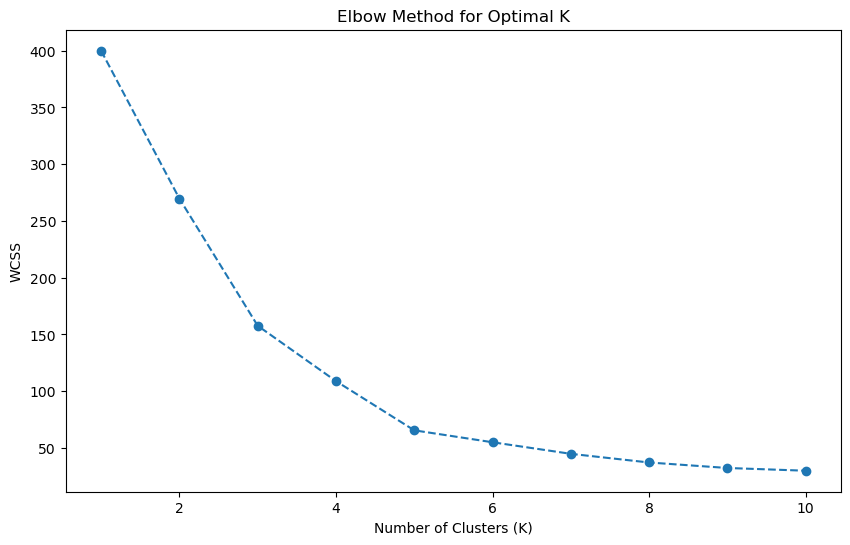

In [18]:

# Cell 4: Use the Elbow method to determine the optimal number of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [15]:
# Cell 5: Train the K-means model with the optimal K (choose K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans.fit(features_scaled)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_


C:\Users\ACER\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


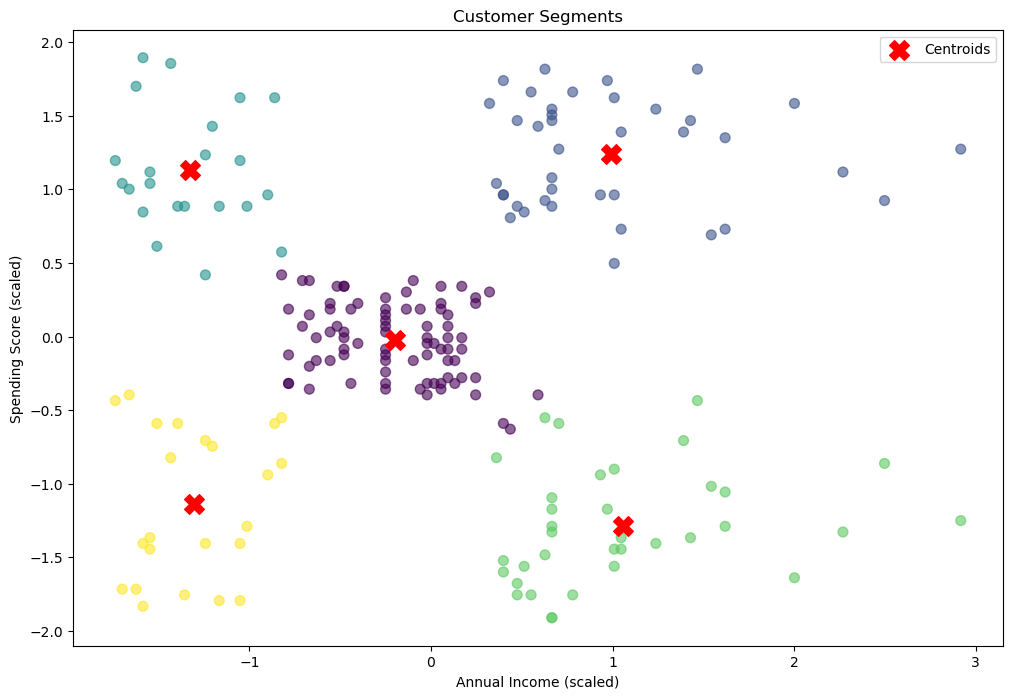

In [16]:
# Cell 6: Visualize the resulting clusters
plt.figure(figsize=(12, 8))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


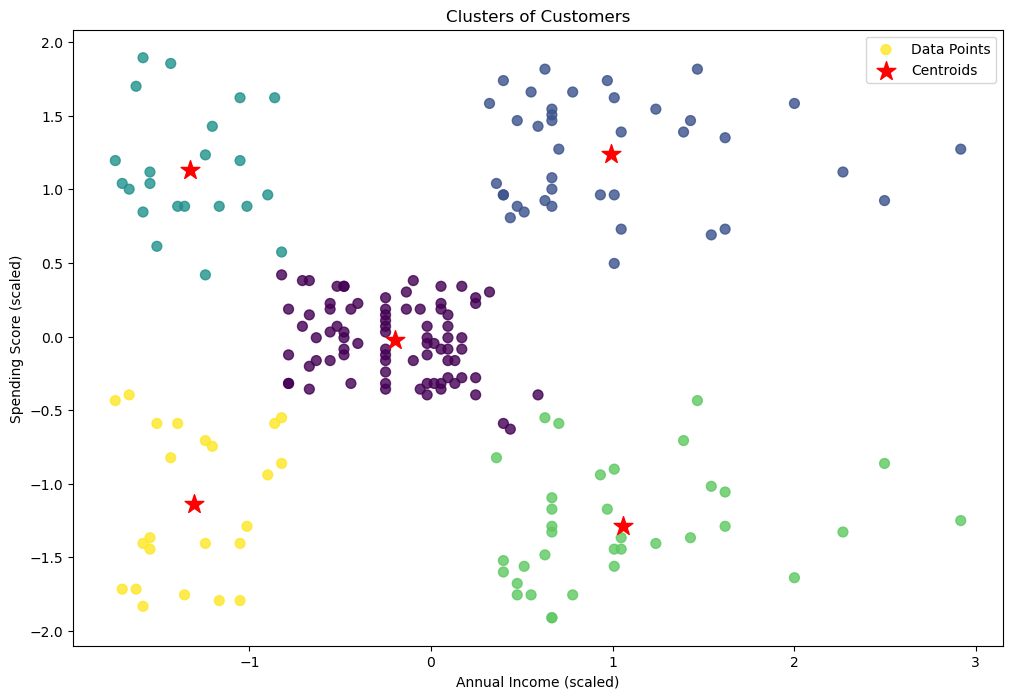

In [17]:
# Cell 7: Visualize the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8, label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()
